In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# STEP 1: Generate Synthetic Data 

np.random.seed(42)

data_size = 1000
neet_scores = np.random.randint(300, 720, data_size)  # NEET scores from 300 to 720
board_marks = np.random.uniform(50, 100, data_size)   # 12th board percentage

#  Updated Admission Criteria
admission_status = (neet_scores * 0.8 + board_marks * 0.2) > 550  
admission_status = admission_status.astype(int)

# Create DataFrame
df = pd.DataFrame({
    "neet_score": neet_scores,
    "board_marks": board_marks,
    "admission_status": admission_status
})

# Save dataset
df.to_csv("aiims_admission_data.csv", index=False)
print(" Dataset Created Successfully!")

 Dataset Created Successfully!


   neet_score  board_marks  admission_status
0         402    84.519741                 0
1         648    51.965607                 0
2         570    89.970520                 0
3         406    81.395019                 0
4         371    54.087952                 0
     neet_score  board_marks  admission_status
995         645    53.471192                 0
996         345    75.952990                 0
997         333    53.380628                 0
998         377    90.017825                 0
999         517    61.685604                 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   neet_score        1000 non-null   int64  
 1   board_marks       1000 non-null   float64
 2   admission_status  1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB
None
neet_score          0
board_marks         0
admissio

C:\Users\Nandini\python\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


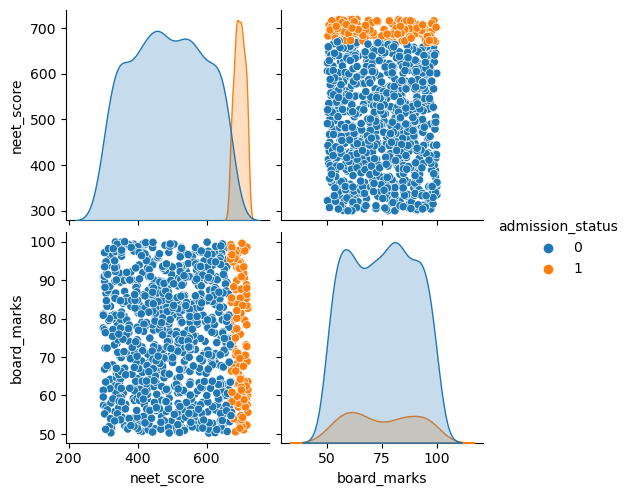

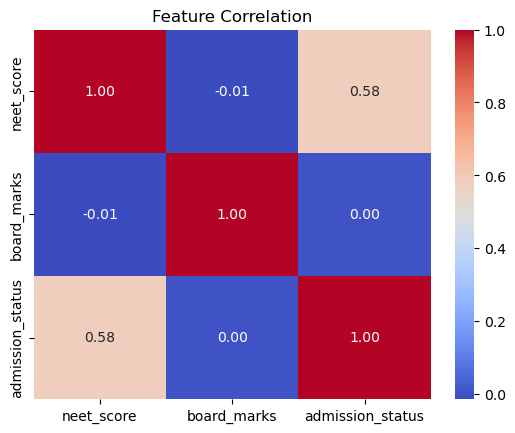

In [4]:
 #STEP 2: Load & Explore Data

df = pd.read_csv("aiims_admission_data.csv")
print(df.head())

print(df.tail())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Pairplot to visualize relationships
sns.pairplot(df, hue="admission_status")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

In [5]:
# Define features (X) and target variable (y)
X = df[['neet_score', 'board_marks']]
y = df['admission_status']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data Preprocessing Completed!")

Data Preprocessing Completed!


In [6]:
#  STEP 4: Train the Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f" Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

 Model Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       169
           1       1.00      1.00      1.00        31

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



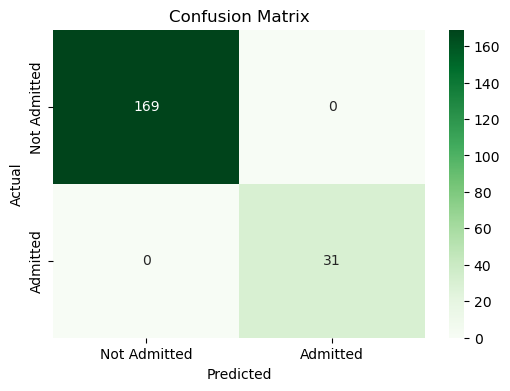

In [7]:
# STEP 5: Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=["Not Admitted", "Admitted"], yticklabels=["Not Admitted", "Admitted"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [8]:
#  STEP 6: Function for User Input Prediction

def predict_admission():
    try:
        # Take user input
        neet_score = float(input(" Enter your NEET score (out of 720): "))
        board_marks = float(input(" Enter your 12th board percentage: "))

        # Validate input
        if not (0 <= neet_score <= 720):
            print(" Invalid NEET score! Must be between 0 and 720.")
            return
        if not (0 <= board_marks <= 100):
            print("Invalid 12th marks! Must be between 0 and 100.")
            return

        # Prepare input data
        input_data = np.array([[neet_score, board_marks]])
        input_data = scaler.transform(input_data)  # Apply scaling

        # Make prediction
        prediction = model.predict(input_data)
        result = " Admitted to AIIMS!" if prediction[0] == 1 else " Not Admitted."

        # Display result
        print(f"\n Prediction: {result}\n")

    except ValueError:
        print(" Invalid input! Please enter numerical values.")

# Run the function
predict_admission()

print("  User Prediction Function Ready!")


 Enter your NEET score (out of 720): 700
 Enter your 12th board percentage: 89

 Prediction:  Admitted to AIIMS!

  User Prediction Function Ready!


C:\Users\Nandini\python\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
